# Avaliação de um modelo de Machine Learning por Cross Validation


<center><img alt="Colaboratory logo" width="50%" src="https://cdn-images-1.medium.com/max/800/0*XJRuatmI2xNAeo3G"></center>

No fim de um projeto de machine learning sempre há uma dúvida sobre a performance do modelo estabelecido. Para isso é necessário usar as métricas para essa avaliação. Na biblioteca scikit-learn é encontrada uma variedade de métricas para uso. Essas métricas são utilizadas após o uso do modelo nos dados de testes.
No momento após uma análise dos dados e antes do modelo é realizada uma separação dos dados. Os dados são separados em dados de treino, esses usados para o treinamento do modelo, e dados de testes usados para avaliação do modelo. É necessário adotar a filosofia de que os dados de teste apenas podem ter contato com o modelo no fim.

<center><img alt="Colaboratory logo" width="50%" src="https://cdn-images-1.medium.com/max/800/0*gL6qcIydcIngI998"></center>

O contato dos dados de testes anteriores podem influenciar o modelo gerando overfitting. Overfitting é definido como um ajuste forçado no modelo para que ele se adeque ao resultado esperado. Ao trabalhar com Machine Learning procura-se um modelo que seja robusto, pois o modelo precisa corresponder a uma realidade de vários dados.

<center><img alt="Colaboratory logo" width="50%" src="https://cdn-images-1.medium.com/max/800/0*QSEG7OIth-1bzISX"></center>

## Cross-Validation
Cross-validation é uma técnica realizada para avaliação do desempenho do modelo. A diferença está que ele avalia o modelo particionando os dados de treino. Ele participa dos dados de treino em dados de treino e validação. Utilizando-se do método K-fold os dados de treino são divididos em subconjuntos. Os dados são divididos em k subconjuntos que a cada iteração um subconjunto é usado para avaliação. Assim é garantido que cada subconjunto seja avaliado.

<center><img alt="Colaboratory logo" width="50%" src="https://cdn-images-1.medium.com/max/800/0*LpRHpz0UT0y4k83L"></center>

Imaginamos o caso de 5-folds no cross-validation. Os dados de treino são divididos em 5 partes. Na primeira iteração uma parte será usada para validação e o restante para treinamento, assim gerando em uma métrica de avaliação. Na segunda iteração a segunda parte será usada para validação o restante para treinamento e assim sucessivamente como mostrado na figura acima.


## Classificação de medicamentos


<center><img alt="Colaboratory logo" width="50%" src="https://cdn-images-1.medium.com/max/800/0*WxhyhrplJT0HIcO-"></center>

O problema aqui abordado será a classificação de medicamentos. Aqui vamos aplicar três modelos de classificadores e avaliá-los por Cross-Validation. Os modelos são: RandomForest, K-neighbors e LogisticRegression. A patir dos resultados decidimos qual o melhor modelo para ser usado nos dados de testes.

In [147]:
# importando bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# importando bibliotecas de machinelearning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Após a seleção das bibliotecas vamos para a importação dos dados. Esses dados foram obtidos no banco de dados do Kaggle.

In [3]:
# importando os dados

DATA_PATH = "https://raw.githubusercontent.com/ptavares96/drugs_classification_cross_validation/main/drug200.csv"

df = pd.read_csv(DATA_PATH)

# dimensões e primeiras entradas
print( 'Dimensões do dataset:\n')
print( 'Quantidade de variáveis (colunas):\t {}'.format(df.shape[1]))
print( 'Quantidade de entradas (linhas):\t {}'.format(df.shape[0]))
print( '\nLeitura das cinco primeiras entradas do conjunto\n')
df.head()

Dimensões do dataset:

Quantidade de variáveis (colunas):	 6
Quantidade de entradas (linhas):	 200

Leitura das cinco primeiras entradas do conjunto



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# checagem do fim dos dados para verficar se há alguma entrada de totias ou sub-totais
print("Checagem do fim das últimas linhas dos dodos:\n")
df.tail(3)

Checagem do fim das últimas linhas dos dodos:



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


### Análise exploratória


#### Dicionário de variáveis:


In [7]:
# dicionário das variáveis
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
print('Valores presentes na variável Sex')
print(df['Sex'].unique())

print('\nValores presentes na variável BP')
print(df['BP'].unique())

print('\nValores presentes na variável Cholesterol')
print(df['Cholesterol'].unique())

print('\nValores presentes na variável Drug')
print(df['Drug'].unique())

Valores presentes na variável Sex
['F' 'M']

Valores presentes na variável BP
['HIGH' 'LOW' 'NORMAL']

Valores presentes na variável Cholesterol
['HIGH' 'NORMAL']

Valores presentes na variável Drug
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


[Age]: corresponde as idades dos indíviduos. 

[Sex]: o sexo dos indivíduos e possuem valores 'M' e 'F'

[BP]: ou blood-peasure corresponde a pressão arterial e possui as entradas ['HIGH' 'LOW' 'NORMAL'].

[Cholesterol]: respresenta o colesterol dos individuos e possui as entradas ['HIGH' 'NORMAL']

[Na_to_K]: representa a razão da concentração de sódio e potássio nos indivíduos. 

[Drug]: esta é a variável alvo que apresenta os medicamentos que cada indivíduo utiliza e possui as entradas ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB'].

In [15]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print('Valores ausentes:\n')
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Valores ausentes:



Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

Entendendo um pouco mais desses dados é visto que não há valores ausentes. Também, vamos verificar a distribuição da idade dos indivíduos.

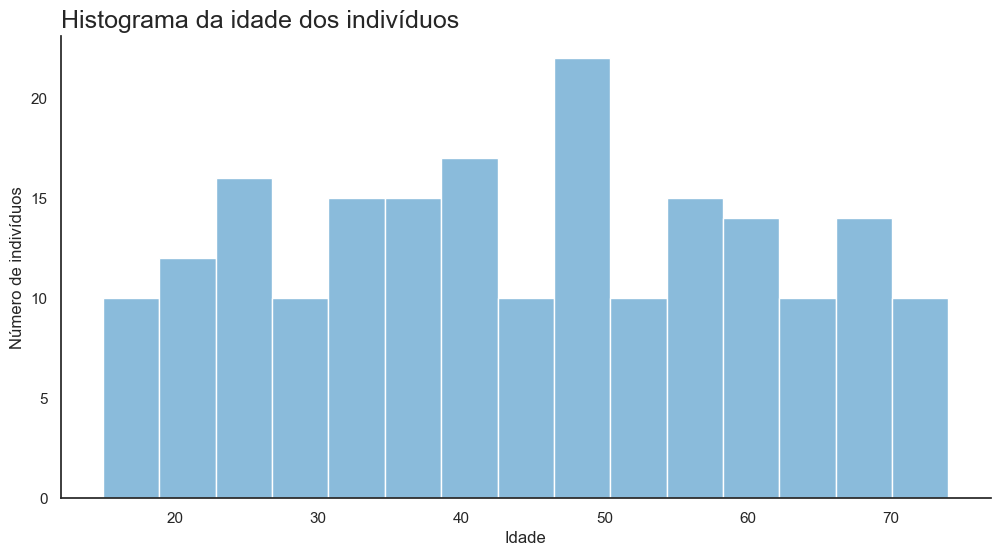

In [37]:
# plotar o histograma das variáveis numéricas
sns.set_theme(style="white", palette="Blues_d")

fig, ax = plt.subplots(figsize=(12,6))

ax.hist(df.Age ,bins=15);
ax.set_title('Histograma da idade dos indivíduos', loc ='left', fontsize=18)
ax.set_xlabel('Idade', fontsize = 12)
ax.set_ylabel('Número de indivíduos', fontsize = 12)
sns.despine()

In [38]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


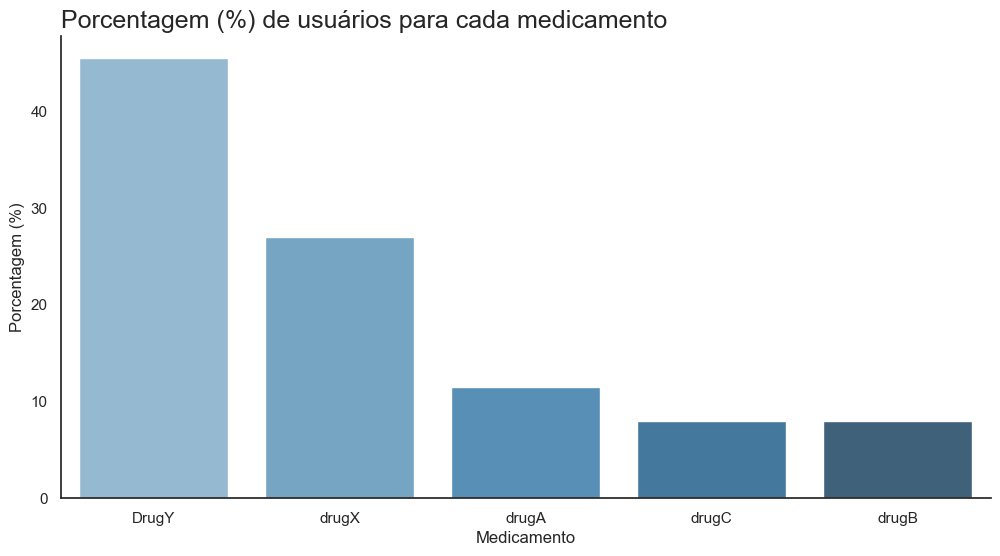

In [33]:
sns.set_theme(style="white", palette="Blues_d")


drugs_count = df.Drug.value_counts()/df.shape[0]*100

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=drugs_count.index, y=drugs_count.values)

ax.set_title('Porcentagem (%) de usuários para cada medicamento', loc='left', fontsize=18)
ax.set_xlabel('Medicamento', fontsize = 12)
ax.set_ylabel('Porcentagem (%)', fontsize = 12)
sns.despine()

A idade mínima dos indivíduos nesses dados é de 15 anos e a maior idade é 74. É visto que a DrugY é a mais utilizada pelos usuários presentes nesses dados.


### Aplicação do modelo de Machine Learning

Será seguido alguns passos até a aplicação do modelo de K-nearest neighbours. 
#### 1. Label enconder das variáveis

Como alguma variáveis dentro desses dados e principalmente a variável alvo são categóricas é necessário transforma-las em variáveis númericas.

In [27]:
df_new = df.copy()

In [28]:
# aplicando LabelEncoder nas variáveis categóricas
label_encoder = LabelEncoder()

In [29]:
def label_e(column):
    df_new[column] = label_encoder.fit_transform(df_new[column])

In [30]:
label_e('Sex')
sex_class = label_encoder.classes_
label_e('BP')
bp_class = label_encoder.classes_
label_e('Cholesterol')
ch_class = label_encoder.classes_
label_e('Drug')
drug_class = label_encoder.classes_

In [31]:
display(df_new)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


O novo dicionário das variáveis é:

[Sex]: ['F' 'M'] = [0 , 1]

[BP]: ['HIGH' 'LOW' 'NORMAL'] = [0, 1, 2]

[Cholesterol]: ['HIGH' 'NORMAL'] = [0, 1]]

[Drug]: ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX'] = [0, 1, 2, 3 , 4]

### 2. Construindo o modelo

Nessa etapa será realizada uma divisão dos dados em dados de treino e teste. Aqui também será realizada a normalização das features.

In [157]:
X = df_new.drop('Drug', axis = 1)
y = df_new.Drug

# split dos dados de treino e teste
X_train, X_test,y_train,y_test = train_test_split(X,y, stratify=y, shuffle=True)


# instanciando modelo de normalização
minmaxscaler = MinMaxScaler()


# aplicando normalização nos dados de treino e teste
X_train_normal = minmaxscaler.fit_transform(X_train)
X_test_normal = minmaxscaler.fit_transform(X_test)

### 3. Aplicando Cross-Validation em alguns modelos

Em cada aplicação dos modelos aqui presentes será usado a métrica acurácia para avaliação. 

a. LogisticRegression

Primeiro será avaliado o modelo de LogisticRegression.

In [161]:
lr = LogisticRegression()

scores = cross_val_score(lr, X_train_normal, y_train, cv = 5)

print("Scores:", scores)
print("\nAcurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.73333333 0.76666667 0.76666667 0.83333333 0.86666667]

Acurácia: 0.79 (+/- 0.10)


b. RandomForest

In [162]:
rfc = RandomForestClassifier()

scores = cross_val_score(rfc, X_train_normal, y_train, cv = 5)

print("Scores:", scores)
print("\nAcurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [1.         1.         1.         0.96666667 1.        ]

Acurácia: 0.99 (+/- 0.03)


c. KNeighbors

In [163]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train_normal, y_train, cv = 5)

print("Scores:", scores)
print("\nAcurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.66666667 0.8        0.9        0.7        0.8       ]

Acurácia: 0.77 (+/- 0.17)


### 4. Aplicação do RandomForestClassifier nos dados de teste

Vamos então fazer a aplicação do modelo de RandomClassifier nos dados de teste

In [164]:
rfc.fit(X_train_normal, y_train)

y_predict = rfc.predict(X_test_normal)

In [165]:
# imprimir relatório de classificação
print("Relatório de Classificação dos dados de teste:\n", classification_report(y_test, y_predict, digits=5))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_predict)))

Relatório de Classificação dos dados de teste:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        23
           1    1.00000   1.00000   1.00000         6
           2    1.00000   1.00000   1.00000         4
           3    1.00000   1.00000   1.00000         4
           4    1.00000   1.00000   1.00000        13

    accuracy                        1.00000        50
   macro avg    1.00000   1.00000   1.00000        50
weighted avg    1.00000   1.00000   1.00000        50

Acurácia: 1.0000



## Conclusão

No projeto foi apresentado a maneira de uso da técnica de cross validation para escolha de um modelo de machine learning. Essa técnica tem usa importância por avaliar o modelo antes de ser usado nos dados de testes. Ao usar essa aplicação temos uma garantia que não hoube um ajuste forçado nos dados, overfitting.

O projeto usado para o uso do cross validation eram dados sobre 5 medicamentos e os indíviduos que os usavam. As features desses dados eram o sexo, idade, pressão arterial, razão sódio potássio e colesterol dos indíviduos. O cross validation foi aplicado em 3 modelso de classificação: Kneighbors, RandomForest e LogisticRegression. Os resultados mostraram que o algorítimo de RandomForest apresentou a maior acurácia. Quando aplicado o modelo nos dados de testes mostrou uma acurácia de 100%. 